# Momentum

**Momentum en física:** $\;$ producto de la masa de un cuerpo por su velocidad instantánea; se conserva en un sistema cerrado

**Momentum en descenso por gradiente:** $\;$ heurísticos para acelerar la convergencia en regiones llanas de la pérdida

## Momentum

**Momentum:** $\;$ acelera el movimiento en direcciones previamente buenas y lo frena en las que el gradiente ha cambiado súbitamente, como una bola pesada rodando montaña abajo; dada una constante $\beta\in[0,1)$ ($\beta=0.9$), el momentum $\boldsymbol{m}_t$ se aplica como sigue:
$$\begin{align*}
\boldsymbol{m}_{t+1}&=\beta\boldsymbol{m}_t+\boldsymbol{g}_t\\%
\boldsymbol{\theta}_{t+1}&=\boldsymbol{\theta}_t-\eta_t\boldsymbol{m}_{t+1}
\end{align*}$$

**Interpretación:** $\;$ con $\beta=0$ es descenso por gradiente; si no, es una media movil ponderada exponencialmente **(EWMA)**
$$\boldsymbol{m}_t=\beta\boldsymbol{m}_{t-1}+\boldsymbol{g}_{t-1}%
=\beta^2\boldsymbol{m}_{t-2}+\beta\boldsymbol{g}_{t-2}+\boldsymbol{g}_{t-1}%
=\cdots=\sum_{\tau=0}^{t-1}\beta^{\tau}\boldsymbol{g}_{t-\tau-1}%
\overset{\{\boldsymbol{m}_t\}=\boldsymbol{g}}{=}\boldsymbol{g}\sum_{\tau=0}^{t-1}\beta^{\tau}%
\overset{t\to\infty}{=}\frac{\boldsymbol{g}}{1-\beta}%
\overset{\beta=0.9}{=}10\,\boldsymbol{g}$$

**Incoveniente:** $\;$ oscila al final del valle por no frenar bastante

**Ejemplo (cont.):** $\;\mathbf{A}=\begin{pmatrix}20&5\\5&16\end{pmatrix}\,$ bien condicionada y 
$\;\mathbf{A}=\begin{pmatrix}20&5\\5&2\end{pmatrix}\,$ peor condicionada; $\;\boldsymbol{b}=(-14, -6)^t$, $\;c=10$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
def plot_8_2_4(ax, x, y, L, TH, levels=30, shrink=0.8):
    X, Y = np.meshgrid(x, y); XY = np.c_[np.ravel(X), np.ravel(Y)]; LL = np.apply_along_axis(L, 1, XY)
    ax.contour(X, Y, LL.reshape(X.shape), levels, colors='orange')
    cp = ax.contourf(X, Y, LL.reshape(X.shape), levels, cmap='Greys')
    plt.colorbar(cp, ax=ax, shrink=shrink)
    T = TH.shape[0]; lines = np.hstack((TH[:-1, :], TH[1:, :])).reshape(T-1, 2, 2)
    ax.add_collection(LineCollection(lines, colors='black', linestyle='solid'));
    ax.scatter(TH[:, 0], TH[:, 1], s=15, c='black', marker='o')

Número de condición:  30.2336
Theta:  [-0.06685106  1.66676201]  L(Theta):  3.201004965606007  Iteraciones:  81


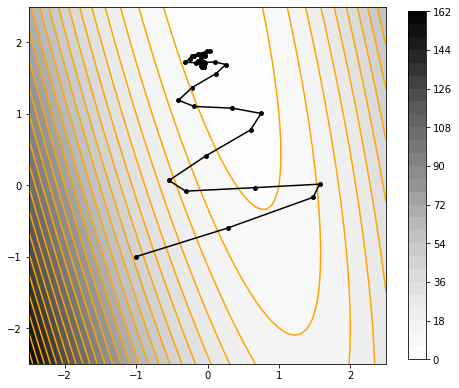

In [2]:
import numpy as np
import matplotlib.pyplot as plt
beta = 0.8 # <--- prueba otros valores
eta = 0.02 # <--- con otros valores no converge o lo hace muy lentamente
# A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10 # <--- bien condicionada
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10 # <--- mal condicionada
print("Número de condición: ", np.round(np.linalg.cond(A), 4))
L = lambda th: 0.5 * th.T @ A @ th + b @ th + c
grad = lambda th: (A + A.T) @ th + b
T = 1000; TH = np.zeros((T, 2)); TH[0, :] = np.array([-1.0, -1.0])
tol = 1e-4; delta = np.inf; t = 1; m = np.zeros(2)
while np.max(np.abs(delta)) > tol and t < T:
    m = beta * m + grad(TH[t-1, :]); delta = -eta * m; TH[t, :] = TH[t-1, :] + delta; t = t + 1
th1, th2 = np.linspace(-2.5, 2.5, num=64), np.linspace(-2.5, 2.5, num=64)
fig, ax = plt.subplots(1, 1, figsize=(8, 8)); ax.set(aspect='equal')
plot_8_2_4(ax, th1, th2, L, TH[:t, :])
print("Theta: ", TH[t-1, :], " L(Theta): ", L(TH[t-1, :]), " Iteraciones: ", t-1)

## Momentum Nesterov

**Gradiente acelerado de Nesterov:** $\;$ añade un paso de extrapolación a descenso por gradiente que actúa a modo de "mirada al futuro" **(look-ahead)** para amortiguar oscilaciones
$$\begin{align*}
\tilde{\boldsymbol{\theta}}_{t+1}&=\boldsymbol{\theta}_t+\beta_t(\boldsymbol{\theta}_t-\boldsymbol{\theta}_{t-1})\\%
\boldsymbol{\theta}_{t+1}&=\tilde{\boldsymbol{\theta}}_{t+1}-\eta_t\nabla\mathcal{L}(\tilde{\boldsymbol{\theta}}_{t+1})%
\end{align*}$$

**Momentum Nesterov:** $\;$ gradiente acelerado de Nesterov expresado como momentum
$$\begin{align*}
\boldsymbol{m}_{t+1}&=\beta\boldsymbol{m}_t-\eta_t\nabla\mathcal{L}(\boldsymbol{\theta}_t+\beta\boldsymbol{m}_t)\\%
\boldsymbol{\theta}_{t+1}&=\boldsymbol{\theta}_t+\boldsymbol{m}_{t+1}%
\end{align*}$$

Número de condición:  30.2336
Theta:  [-0.06550228  1.66217315]  L(Theta):  3.2053374263477625  Iteraciones:  49


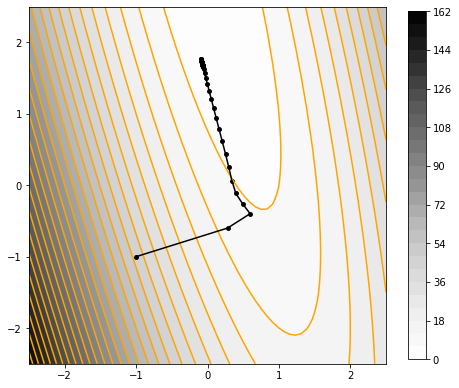

In [3]:
import numpy as np
import matplotlib.pyplot as plt
beta = 0.8 # <--- prueba otros valores
eta = 0.02 # <--- con otros valores no converge o lo hace muy lentamente
# A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10 # <--- bien condicionada
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10 # <--- mal condicionada
print("Número de condición: ", np.round(np.linalg.cond(A), 4))
L = lambda th: 0.5 * th.T @ A @ th + b @ th + c
grad = lambda th: (A + A.T) @ th + b
T = 1000; TH = np.zeros((T, 2)); TH[0, :] = np.array([-1.0, -1.0])
tol = 1e-4; delta = np.inf; t = 1; m = np.zeros(2)
while np.max(np.abs(delta)) > tol and t < T:
    m = beta * m - eta * grad(TH[t-1, :] + beta * m); delta = m; TH[t, :] = TH[t-1, :] + delta; t = t + 1
th1, th2 = np.linspace(-2.5, 2.5, num=64), np.linspace(-2.5, 2.5, num=64)
fig, ax = plt.subplots(1, 1, figsize=(8, 8)); ax.set(aspect='equal')
plot_8_2_4(ax, th1, th2, L, TH[:t, :])
print("Theta: ", TH[t-1, :], " L(Theta): ", L(TH[t-1, :]), " Iteraciones: ", t-1)